In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns  # for heatmap


The best action to choose after training (UCB) is: Action 4


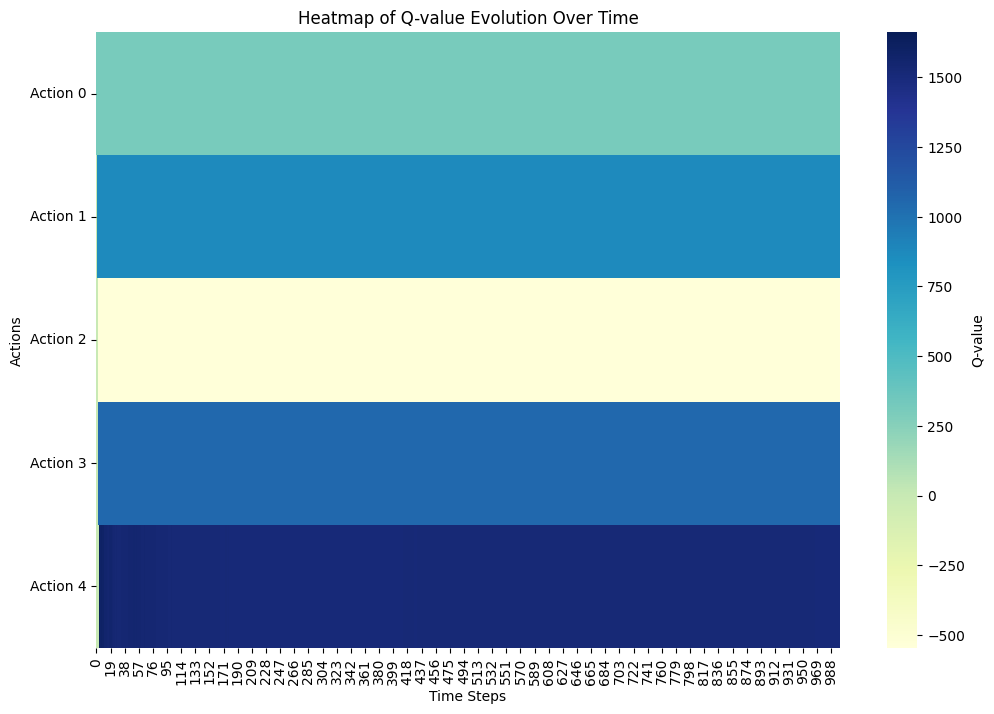

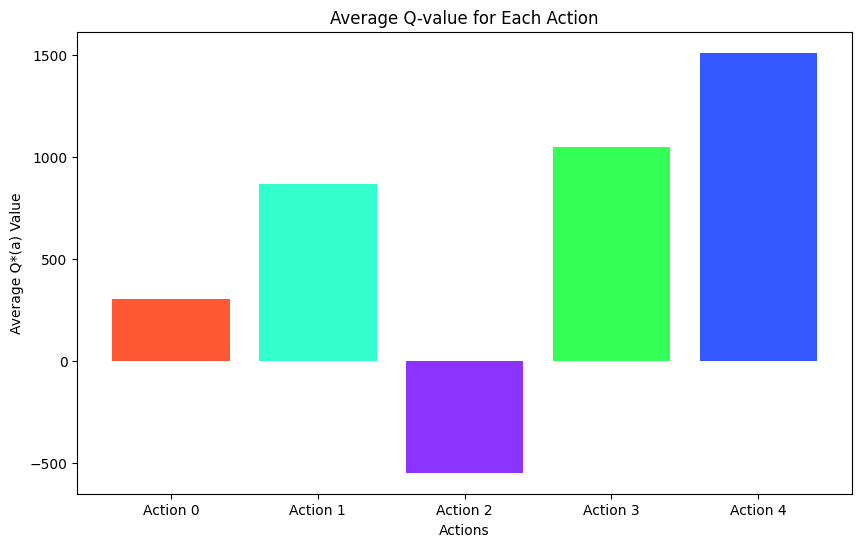

In [2]:

class StockOptimizerUCB:
    def __init__(self, n_actions=5, time_steps=1000, c=2):
        self.n_actions = n_actions
        self.time_steps = time_steps
        self.q_values = np.zeros(n_actions)
        self.action_counts = np.zeros(n_actions)
        self.stock_mean = [300, 450, 100, 550, 800]
        self.comparison_mean = [400, 150, 500, 100, 80]
        self.std_dev = 50
        self.q_value_history = np.zeros((time_steps, n_actions))
        self.c = c

    def get_reward(self, action):
        stock_viewers = np.random.normal(self.stock_mean[action], self.std_dev)
        comparison_viewers = np.random.normal(self.comparison_mean[action], self.std_dev)
        reward = (2 * stock_viewers) - comparison_viewers
        return reward

    def select_action(self, t):
        if t < self.n_actions:
            return t
        ucb_values = self.q_values + self.c * np.sqrt(np.log(t) / (self.action_counts + 1e-5))
        return np.argmax(ucb_values)

    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        self.q_values[action] += (1 / self.action_counts[action]) * (reward - self.q_values[action])

    def train(self):
        rewards = []
        for t in range(self.time_steps):
            action = self.select_action(t)
            reward = self.get_reward(action)
            self.update_estimates(action, reward)
            rewards.append(reward)
            self.q_value_history[t] = self.q_values.copy()
        return rewards

    def plot_results(self):
        # Heatmap for Q-value evolution over time for each action
        plt.figure(figsize=(12, 8))
        sns.heatmap(self.q_value_history.T, cmap="YlGnBu", cbar_kws={'label': 'Q-value'})
        plt.title("Heatmap of Q-value Evolution Over Time")
        plt.xlabel("Time Steps")
        plt.ylabel("Actions")
        plt.yticks(np.arange(0.5, self.n_actions, 1), labels=[f'Action {i}' for i in range(self.n_actions)], rotation=0)
        plt.show()

        # Bar plot for average reward per action
        avg_rewards = np.mean(self.q_value_history, axis=0)
        plt.figure(figsize=(10, 6))
        plt.bar(range(self.n_actions), avg_rewards, color=['#FF5733', '#33FFCE', '#8D33FF', '#33FF57', '#3358FF'])
        plt.title("Average Q-value for Each Action")
        plt.xlabel("Actions")
        plt.ylabel("Average Q*(a) Value")
        plt.xticks(range(self.n_actions), labels=[f'Action {i}' for i in range(self.n_actions)])
        plt.show()

    def get_best_action(self):
        return np.argmax(self.q_values)

# Running the UCB optimizer
stock_optimizer_ucb = StockOptimizerUCB()
rewards_ucb = stock_optimizer_ucb.train()
best_action_ucb = stock_optimizer_ucb.get_best_action()
print(f"The best action to choose after training (UCB) is: Action {best_action_ucb}")

stock_optimizer_ucb.plot_results()
